
### BUSINESS PROBLEM
NIFTY is a market index introduced by the National Stock Exchange. 
The calculation of Nifty 50 is defined by taking the weighted value of the 50 stocks listed on NSE and is based on free-float market capitalization.
However, the estimation of overall NIFTY price increase or decrease has been a task for brokers. 

### AIM
The aim of this assignment is to gather the various factors on which NIFTY depends and find the probable increment or decrement of NIFTY prices. This model will help the brokers to predict the increment or decrement in the NIFTY prices, so that they can guide the customers better.

### DATA NEEDED
The % increase or decrease in NIFTY price and the various factors like INR USD, Bloomberg commodity index, Indian crude oil etc. All the values are in %.

### SOURCES OF DATA
The data has been collected for the last 5 years (every 6 months) from the offical source - Bloomberg.

#### KIND OF ANALYTICS
Descriptive and predictive

### Importing libraries

In [251]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from scipy import stats
import scipy.stats as stats
import category_encoders as ce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt

!wget -O dataset-finance.csv https://raw.githubusercontent.com/ravikant3011/data-set/main/dataset-finance.csv

--2023-03-06 23:50:17--  https://raw.githubusercontent.com/ravikant3011/data-set/main/dataset-finance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3229 (3.2K) [text/plain]
Saving to: 'dataset-finance.csv'

dataset-finance.csv 100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-03-06 23:50:17 (10.7 MB/s) - 'dataset-finance.csv' saved [3229/3229]



In [252]:
#Reading the dataset
df= pd.read_csv("dataset-finance.csv")

In [253]:
print("--------Displaying First & Last 5 Records----------")
pd.concat([df.head(5), df.tail(5)])

--------Displaying First & Last 5 Records----------


,Date,Nifty Price,INR USD,Bloomberg Commodity Index,Copper to Gold Ratio,Brent Crude (USD),India Crude (INR),Forex Reserve,EPFR India Net Asset size,Gold,Passenger Vehicle Sales,Tractors Sales,2 Wheeler Sales
0,31/03/19,6.3,4.8,-4.8,-4.6,-17.3,-22.0,2.8,-2.2,4.3,-1.2,-29.8,-31.8
1,30/04/19,13.1,6.3,-3.1,0.8,-3.5,-10.8,6.7,8.1,0.1,-17.3,-49.0,-19.9
2,31/05/19,9.6,-0.2,-5.9,-12.8,9.8,9.5,7.1,4.3,6.0,-14.2,-7.4,4.7
3,30/06/19,8.5,1.1,3.8,-8.5,23.7,22.8,8.7,3.3,7.7,-9.8,81.5,30.7
4,31/07/19,2.7,3.3,-2.2,-10.3,5.3,0.8,7.9,1.2,4.8,-31.5,-10.6,-4.1
38,31/05/22,-2.3,-3.2,37.1,-4.1,74.1,70.6,-5.7,-21.0,5.9,16.7,28.5,19.1
39,30/06/22,-9.1,-5.9,18.0,-14.2,47.6,58.2,-6.4,-23.0,5.8,26.4,112.7,28.7
40,31/07/22,-1.0,-5.9,12.9,-15.7,20.6,29.7,-8.9,-15.9,7.5,15.2,4.6,21.1
41,31/08/22,5.7,-5.2,6.2,-11.8,-4.5,6.7,-11.2,-8.0,1.0,6.0,1.4,48.3
42,30/09/22,-2.1,-6.8,-10.4,-13.5,-18.5,-11.8,-13.8,-7.8,-2.4,9.0,56.0,44.1


In [254]:
# display column headings
print("Column headings:")
print(df.columns)

# display statistical information
print("\nStatistical information:")
print(df.describe())

# display description of data
print("\nDescription:")
print(df.info())

# display statistical summary
print("\nStatistical summary:")
print(df.describe(include='all'))


#To find size of the data set
print("Size of dataset: ", df.shape)


Column headings:
Index(['Date', 'Nifty Price', 'INR USD', 'Bloomberg Commodity Index',
       'Copper to Gold Ratio', 'Brent Crude (USD)', 'India Crude (INR)',
       'Forex Reserve', 'EPFR India Net Asset size', 'Gold',
       'Passenger Vehicle Sales', 'Tractors Sales', '2 Wheeler Sales'],
      dtype='object')

Statistical information:
       Nifty Price    INR USD  Bloomberg Commodity Index  \
count    43.000000  43.000000                  43.000000   
mean      7.448837  -1.360465                   6.753488   
std      14.464873   3.149236                  14.446442   
min     -25.100000  -6.800000                 -23.100000   
25%      -1.150000  -3.350000                  -4.450000   
50%       6.300000  -1.700000                   6.200000   
75%      18.000000   0.750000                  18.000000   
max      35.700000   6.300000                  37.100000   

       Copper to Gold Ratio  Brent Crude (USD)  India Crude (INR)  \
count             43.000000          43.000000   

1. Size of the dataset is (43, 13) -> 43 rows and 13 column

2. Data attributes are mainly numerical

3. Yes, there is a null value which need to clean by putting mean value of that column

# Data Preparation

In [255]:
print('Checking for Duplicate Data...')
isDuplicate = df.duplicated().any()
if not isDuplicate:
    print('No Duplicate Data Found!')
else:
    print(str(df.duplicated().sum()) + ' Duplicate Entries Found!')

print('Checking for Missing Data...')
isMissing = df.isnull().any().sum() > 0
if not isMissing:
    print('No Missing Data Found!')
else:
    cols_with_missing_value = df.columns[df.isnull().any()].tolist()
    print(str(df.isnull().any().sum()) + ' Missing Entries Found!')


print('Checking for Data Inconsistencies...')

df.dtypes

#checking for outliers data in dataset

print('Checking for Data Inconsistencies for outliers...')
z_scores = stats.zscore(df.drop(columns=['Date']))

# Find the absolute value of the Z-scores
abs_z_scores = np.abs(z_scores)

# Identify the rows that contain outliers (Z-score > 3)
outlier_rows = np.where(abs_z_scores > 3)[0]
print("Outliers are : ", outlier_rows)

Checking for Duplicate Data...
No Duplicate Data Found!
Checking for Missing Data...
1 Missing Entries Found!
Checking for Data Inconsistencies...
Checking for Data Inconsistencies for outliers...
Outliers are :  [19 19]


In [256]:
beforeCount = len(df)

if isDuplicate:
    df.drop_duplicates(keep='first', inplace=True)
    print("Duplicate Rows were Removed.")
else:
    print("No Duplicate Rows to Remove.")
if isMissing:
    for column_name in cols_with_missing_value:
        df[column_name] = df[column_name].fillna(df[column_name].mean())
    print('Missing Data Replaced')
else:
    print('No Missing Data Found')

#To remove outliers data 

# Remove the rows that contain outliers (Z-score > 3)
print('Removing outliers')
df = df.drop(outlier_rows)


No Duplicate Rows to Remove.
Missing Data Replaced
Removing outliers


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 42
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       42 non-null     object 
 1   Nifty Price                42 non-null     float64
 2   INR USD                    42 non-null     float64
 3   Bloomberg Commodity Index  42 non-null     float64
 4   Copper to Gold Ratio       42 non-null     float64
 5   Brent Crude (USD)          42 non-null     float64
 6   India Crude (INR)          42 non-null     float64
 7   Forex Reserve              42 non-null     float64
 8   EPFR India Net Asset size  42 non-null     float64
 9   Gold                       42 non-null     float64
 10  Passenger Vehicle Sales    42 non-null     float64
 11  Tractors Sales             42 non-null     float64
 12  2 Wheeler Sales            42 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.6+ KB


## Identify the target variables.


Features (X) : 
     INR USD  Bloomberg Commodity Index  Copper to Gold Ratio  \
0       4.8                       -4.8                  -4.6   
1       6.3                       -3.1                   0.8   
2      -0.2                       -5.9                 -12.8   
3       1.1                        3.8                  -8.5   
4       3.3                       -2.2                 -10.3   
5      -0.9                       -5.4                 -25.5   
6      -2.4                       -4.1                 -22.9   
7      -1.9                       -1.7                 -23.8   
8      -2.8                       -0.8                 -10.2   
9      -3.3                        1.5                  -4.5   
10     -3.6                       -5.2                 -16.3   
11     -1.1                       -7.8                  -4.8   
12     -6.2                      -20.5                 -19.0   
13     -5.6                      -23.1                 -19.8   
14     -5.1            

<AxesSubplot:>

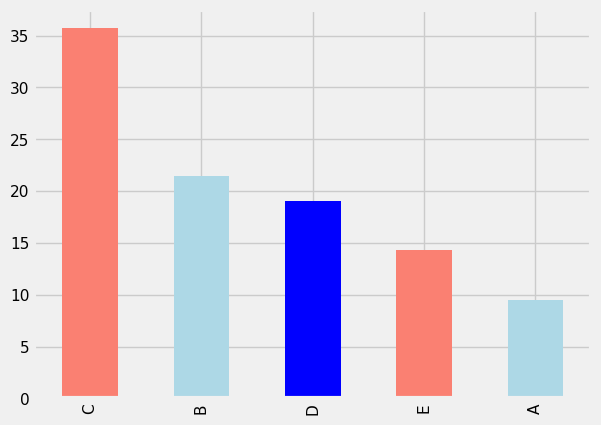

In [262]:
#Considering given dataset we have target variable -> Nifty Price 

df = df.drop(columns=['Date'])

# Data separation
X = df.drop(['Nifty Price'], axis=1)
y = df['Nifty Price']

print("Features (X) : \n",X)

print("Features (y) : \n",y)

#To discretize a target variable we can use binning as below

bins = 5

labels = ['A', 'B', 'C', 'D', 'E']

# Discretize the numerical column into categorical data
df['target_valriable'] = pd.cut(df['Nifty Price'], labels = labels, bins=bins)

# View the result
#print(df[['Nifty Price', 'target_valriable']].head())

X = df.drop(['Nifty Price','target_valriable'], axis=1)
y = df['target_valriable']

print("Updated target variable Features (y) after binning: \n",y)

# Report the observations in bar graph
print("Plotting class distribution with percentage with respect to the tagrget variable: \n ")
df_class_percent_target_var = df.target_valriable.value_counts()/df.target_valriable.count()*100
df_class_percent_target_var
df_class_percent_target_var.plot(kind="bar", color=["salmon", "lightblue", "blue"])
#We observed that the majority of % NIFTY price falls under bin C

# Data Exploration using various plots



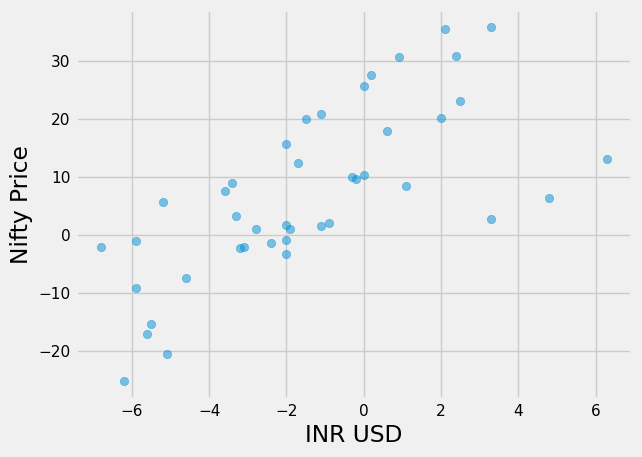

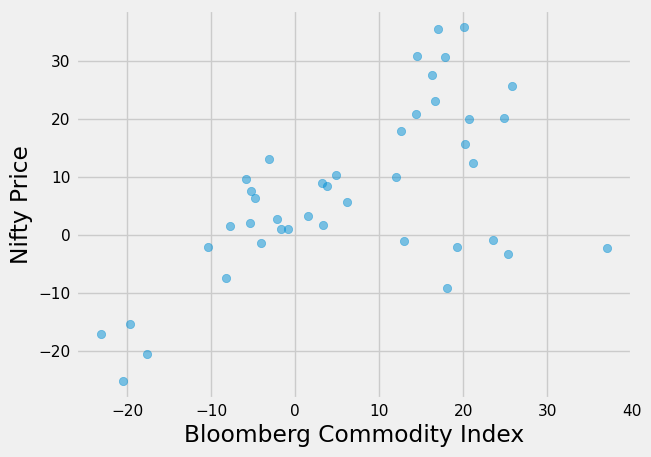

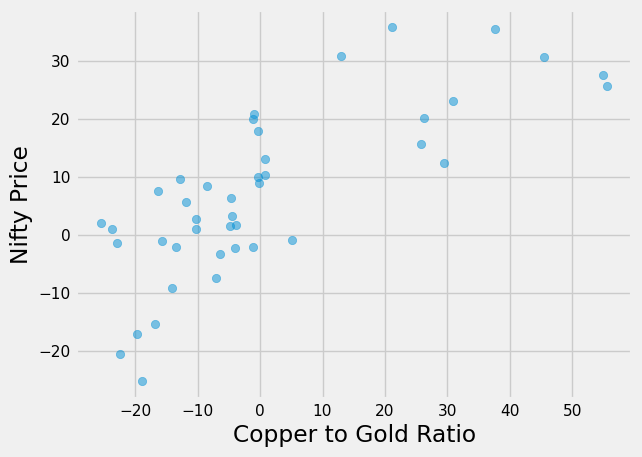

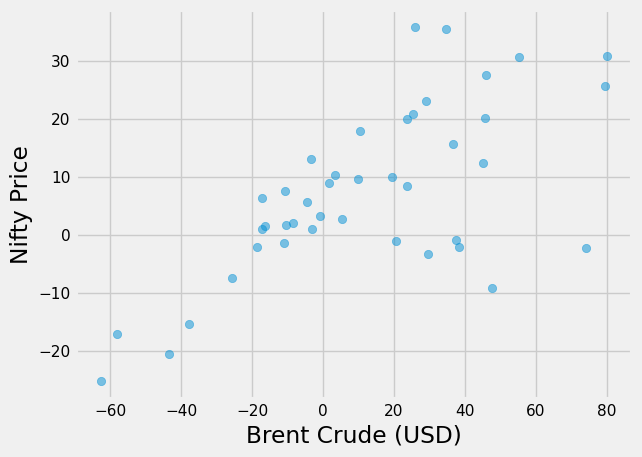

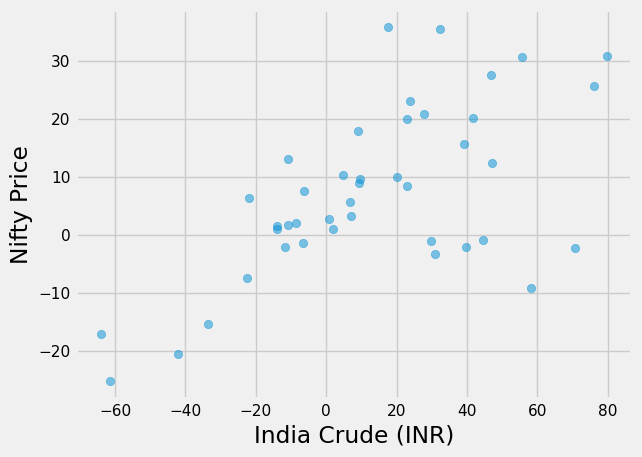

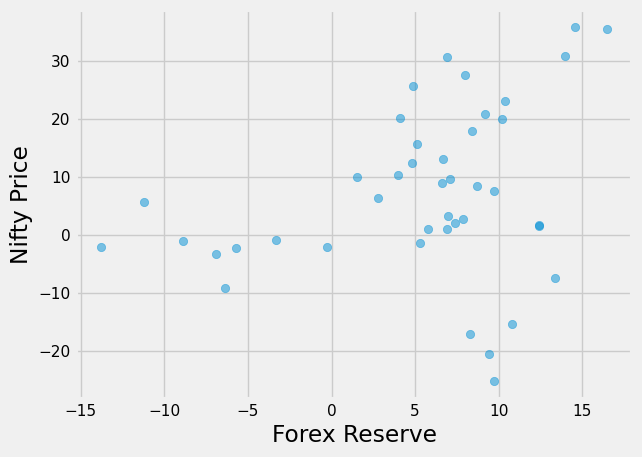

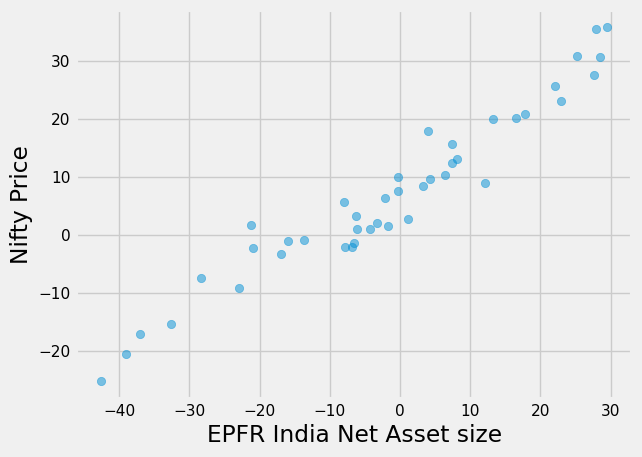

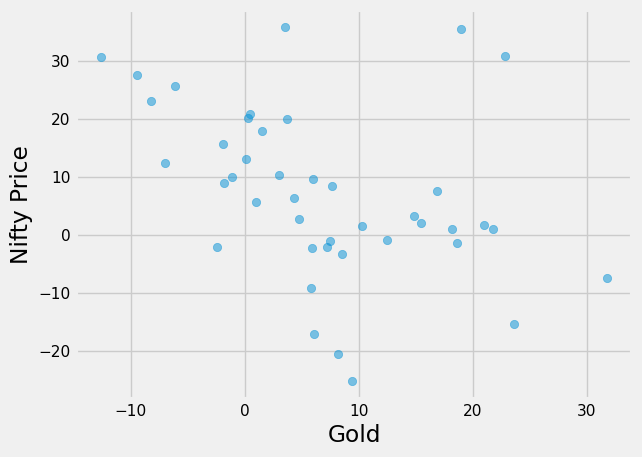

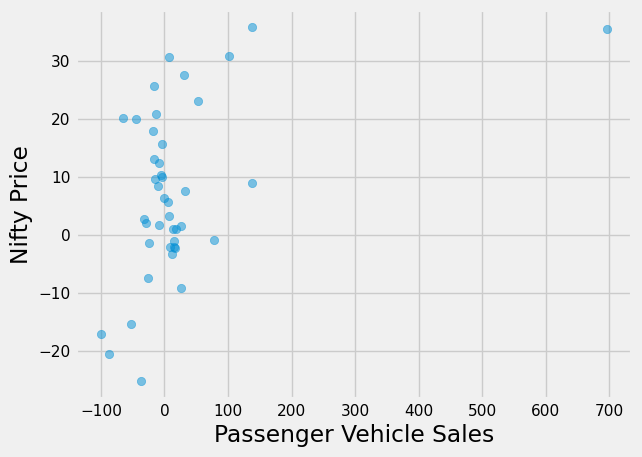

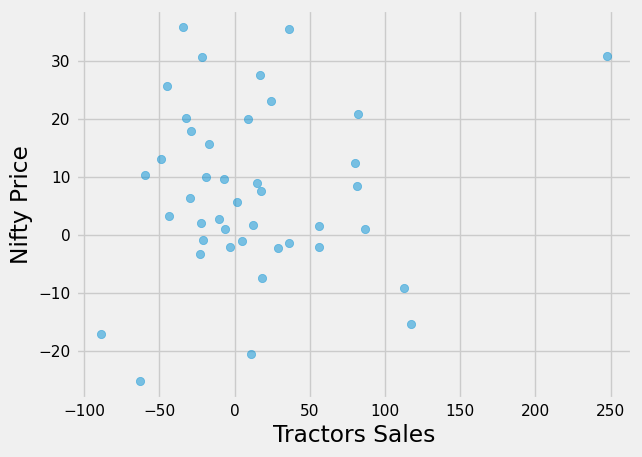

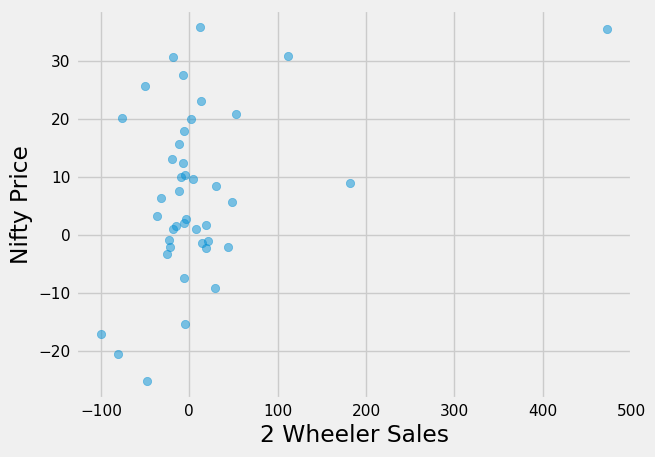

In [263]:
df_quant = df.drop(columns=['Nifty Price'])
quantitative_cols = df_quant.select_dtypes(include='number').columns.tolist()

target = 'Nifty Price'

for col in quantitative_cols:
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

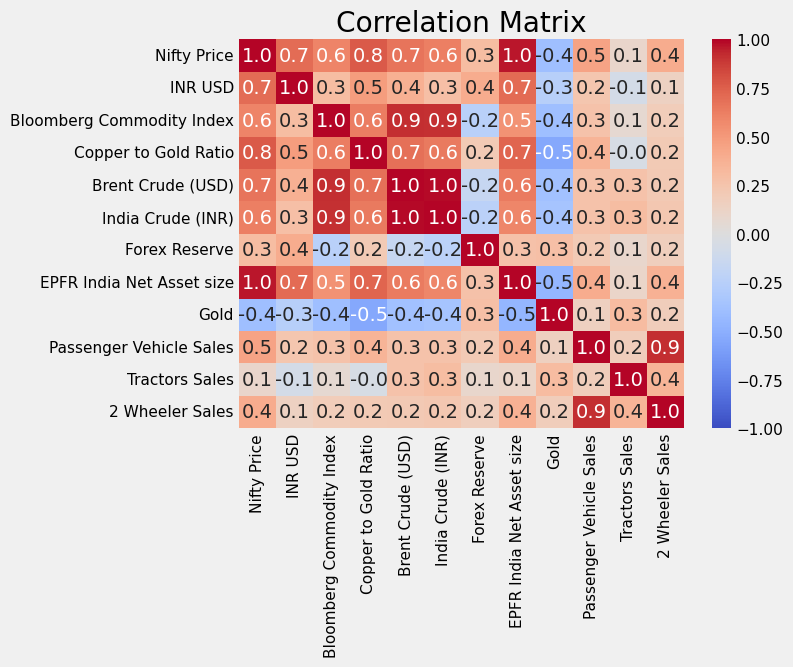

r for  Nifty Price  and  Nifty Price : 0.9999999999999997
R-squared for  Nifty Price  and  Nifty Price : 1.0
Adjusted R-squared for  Nifty Price  and  Nifty Price : 1.0


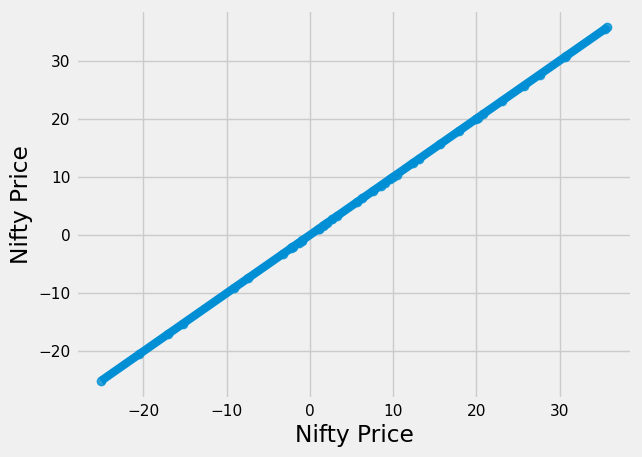

r for  INR USD  and  Nifty Price : 0.7013596612598947
R-squared for  INR USD  and  Nifty Price : 0.4919053744425944
Adjusted R-squared for  INR USD  and  Nifty Price : 0.4792030088036593


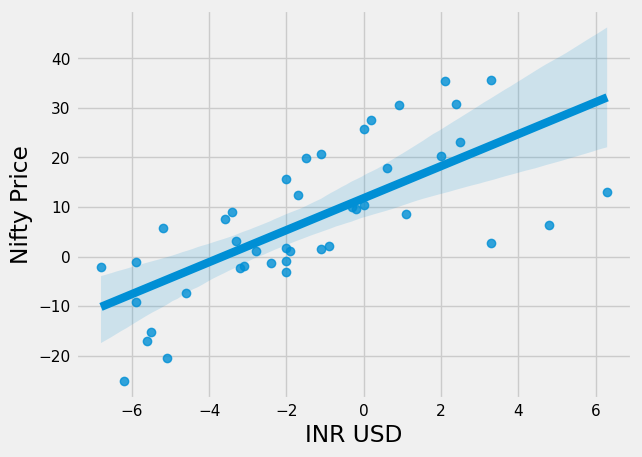

r for  Bloomberg Commodity Index  and  Nifty Price : 0.6002767663103946
R-squared for  Bloomberg Commodity Index  and  Nifty Price : 0.36033219617206436
Adjusted R-squared for  Bloomberg Commodity Index  and  Nifty Price : 0.34434050107636593


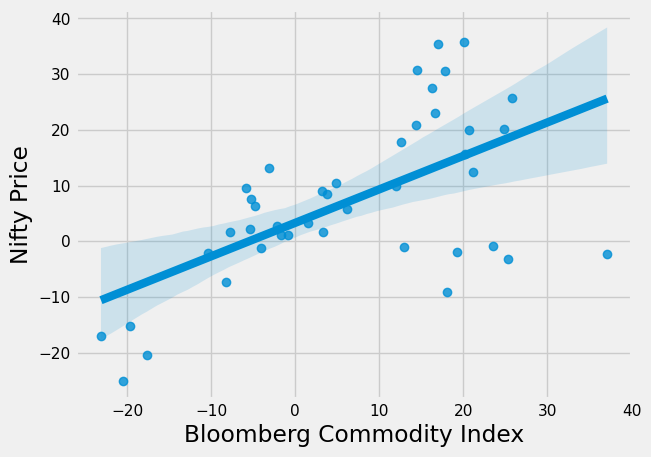

r for  Copper to Gold Ratio  and  Nifty Price : 0.7724099544797736
R-squared for  Copper to Gold Ratio  and  Nifty Price : 0.5966171377794462
Adjusted R-squared for  Copper to Gold Ratio  and  Nifty Price : 0.5865325662239325


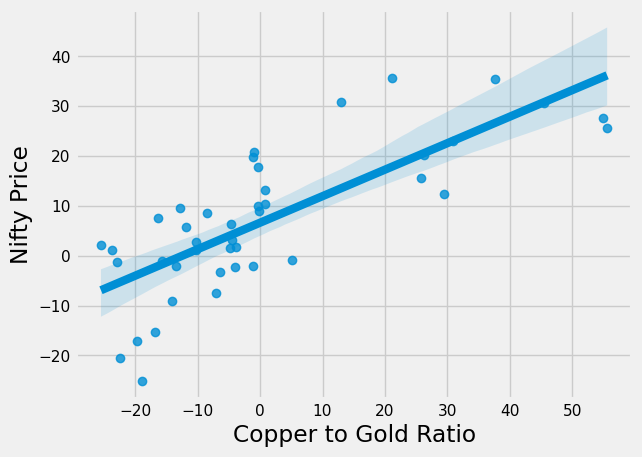

r for  Brent Crude (USD)  and  Nifty Price : 0.6702529931433692
R-squared for  Brent Crude (USD)  and  Nifty Price : 0.44923907481764547
Adjusted R-squared for  Brent Crude (USD)  and  Nifty Price : 0.4354700516880866


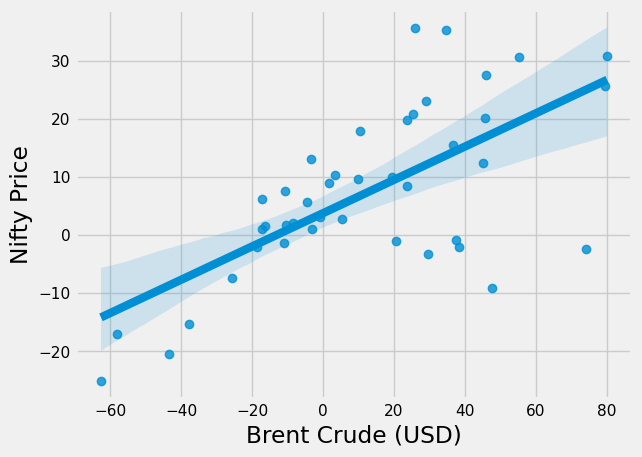

r for  India Crude (INR)  and  Nifty Price : 0.6240100716789498
R-squared for  India Crude (INR)  and  Nifty Price : 0.3893885695567686
Adjusted R-squared for  India Crude (INR)  and  Nifty Price : 0.3741232837956878


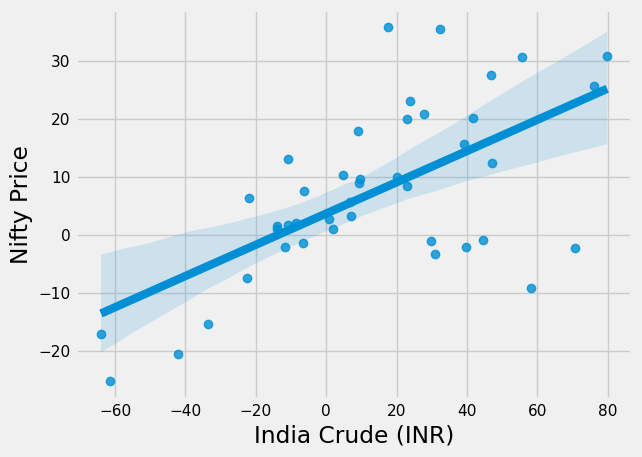

r for  Forex Reserve  and  Nifty Price : 0.2994159188421497
R-squared for  Forex Reserve  and  Nifty Price : 0.0896498924560889
Adjusted R-squared for  Forex Reserve  and  Nifty Price : 0.06689113976749117


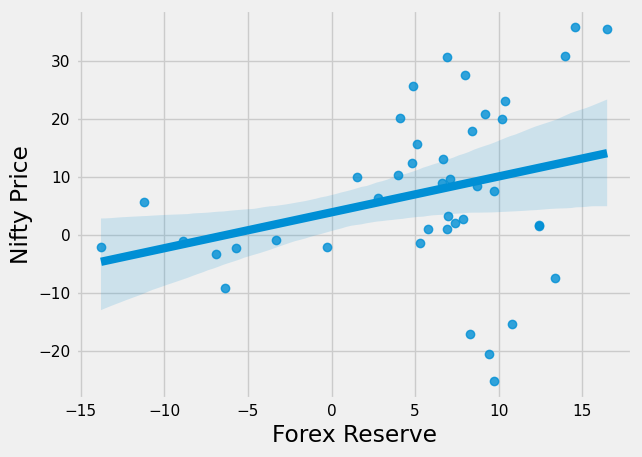

r for  EPFR India Net Asset size  and  Nifty Price : 0.9658842648048733
R-squared for  EPFR India Net Asset size  and  Nifty Price : 0.932932412997651
Adjusted R-squared for  EPFR India Net Asset size  and  Nifty Price : 0.9312557233225922


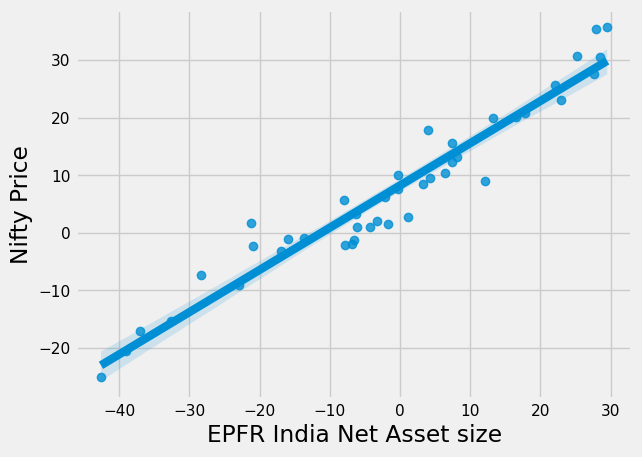

r for  Gold  and  Nifty Price : 0.3973942713194452
R-squared for  Gold  and  Nifty Price : 0.15792220687751313
Adjusted R-squared for  Gold  and  Nifty Price : 0.13687026204945096


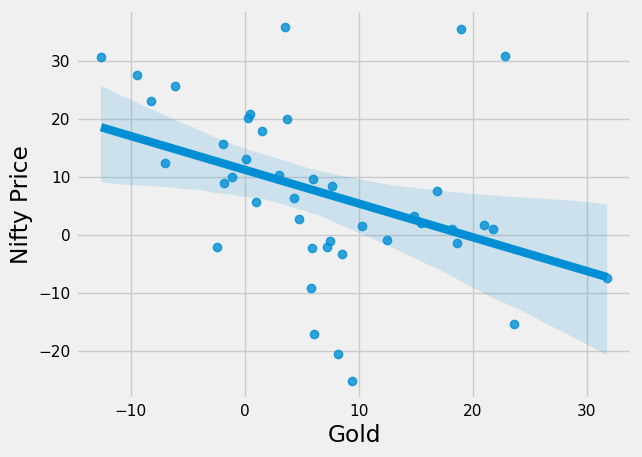

r for  Passenger Vehicle Sales  and  Nifty Price : 0.451549691446689
R-squared for  Passenger Vehicle Sales  and  Nifty Price : 0.20389712384560033
Adjusted R-squared for  Passenger Vehicle Sales  and  Nifty Price : 0.1839945519417403


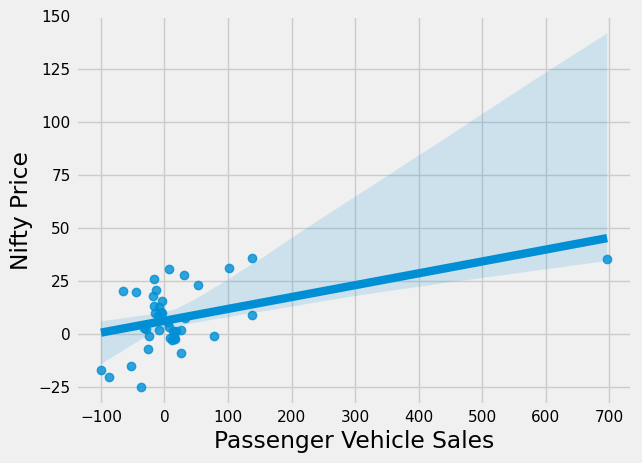

r for  Tractors Sales  and  Nifty Price : 0.10000572695416289
R-squared for  Tractors Sales  and  Nifty Price : 0.010001145423630842
Adjusted R-squared for  Tractors Sales  and  Nifty Price : -0.01474882594077842


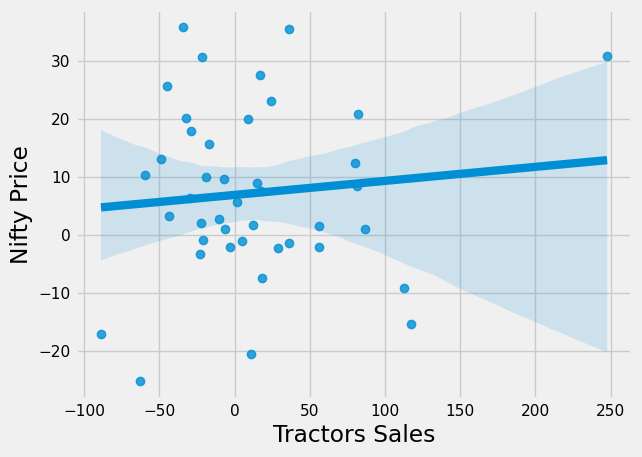

r for  2 Wheeler Sales  and  Nifty Price : 0.3987833550040656
R-squared for  2 Wheeler Sales  and  Nifty Price : 0.15902816422829902
Adjusted R-squared for  2 Wheeler Sales  and  Nifty Price : 0.13800386833400646


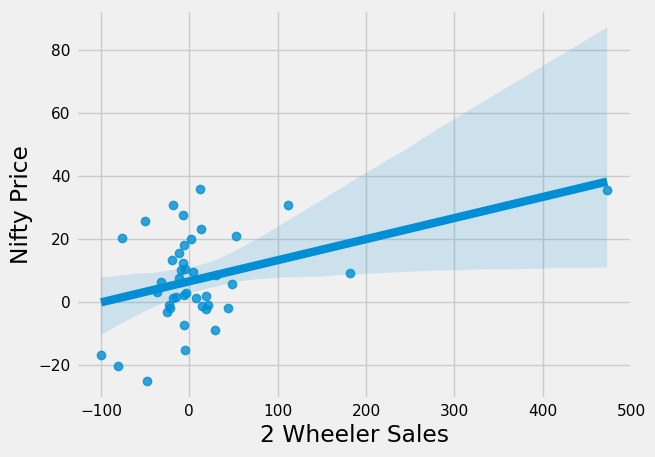

In [264]:
#correlation plot
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.1f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#Regression plot
quantitative_cols = df.select_dtypes(include='number').columns.tolist()
target = 'Nifty Price'
for col in quantitative_cols:
    # create a regression plot for x1 and y
    sns.regplot(x=col, y=target, data=df)

    # calculate r, R-squared, and adjusted R-squared for x1 and y
    X = df[[col]]
    y_true = df[target]
    model = LinearRegression().fit(X, y_true)
    y_pred = model.predict(X)
    r, _ = pearsonr(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = 1
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print('r for ', col, ' and ',target,':', r)
    print('R-squared for ', col, ' and ',target,':', r2)
    print('Adjusted R-squared for ', col, ' and ',target,':', adj_r2)
    plt.show()


Like our business problem is to find the factors which have maximum impact on the NIFTY price, therefore, heatmap anad regression plot would be the best visualization techniquess to find the optimal set of attributes. Heatmap will give us the correlation of each of the factors with NIFTY price. The values more than 0.5 are apt for a factor to have considerable impact onthe NIFTY.
From the Regression plots, we can get values of the R^2 or coefficient of determination, which will give us how well the variance is explained by the model. 
Larger the value of R^2 indicates that the factor is better predictor of our target variable. Any value above 0.6 shall be good enough to consider that factor.

# Data Wrangling



Temp df  : 
     Nifty Price  INR USD  Bloomberg Commodity Index  Copper to Gold Ratio  \
14        -20.5     -5.1                      -17.6                 -22.5   
13        -17.0     -5.6                      -23.1                 -19.8   
12        -25.1     -6.2                      -20.5                 -19.0   
15        -15.3     -5.5                      -19.7                 -16.8   
42         -2.1     -6.8                      -10.4                 -13.5   
35         -2.0     -3.1                       19.3                  -1.1   
16         -7.4     -4.6                       -8.2                  -7.0   
36         -0.9     -2.0                       23.5                   5.1   
37         -3.2     -2.0                       25.3                  -6.4   
38         -2.3     -3.2                       37.1                  -4.1   
39         -9.1     -5.9                       18.0                 -14.2   
40         -1.0     -5.9                       12.9            

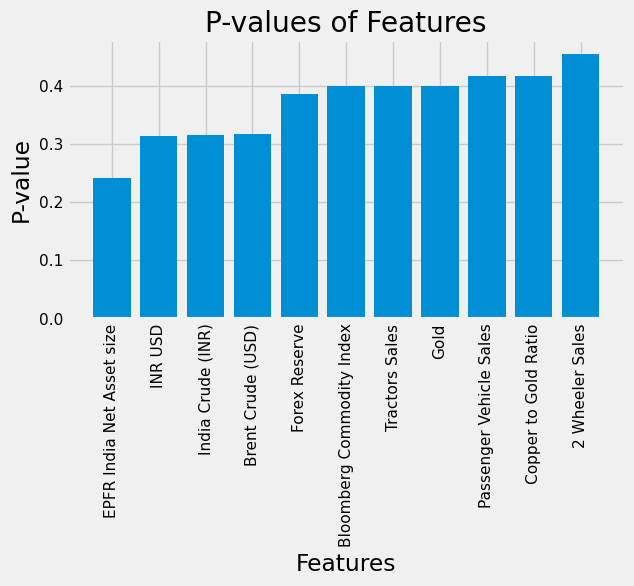

Gini result: 
                       Feature  Gini Index
0                     INR USD    0.760771
1   Bloomberg Commodity Index    0.760771
2        Copper to Gold Ratio    0.760771
3           Brent Crude (USD)    0.760771
4           India Crude (INR)    0.760771
5               Forex Reserve    0.760771
6   EPFR India Net Asset size    0.760771
7                        Gold    0.760771
8     Passenger Vehicle Sales    0.760771
9              Tractors Sales    0.760771
10            2 Wheeler Sales    0.760771


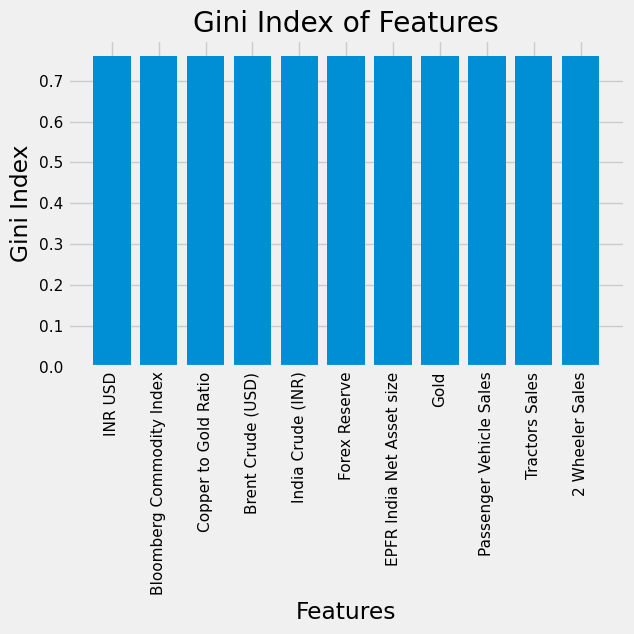

In [265]:
#performing binning to convert target varible numberrical data to categorical data
bins = 5

labels = ['A', 'B', 'C', 'D', 'E']

# Discretize the numerical column into categorical data
df['target_valriable'] = pd.cut(df['Nifty Price'], labels = labels, bins=bins)
temp_df = df.sort_values('target_valriable')
print("Temp df  : \n", temp_df)
# View the result
#print(df[['Nifty Price', 'target_valriable']].head())

X = df.drop(['Nifty Price','target_valriable'], axis=1)
y = df['target_valriable']


##################################
#Chi-Squared test

# Define a function to perform the chi-squared test for each feature
def chi_squared_test(df, target_col):
    results = []
    for col in df.drop(target_col, axis=1).columns:
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        results.append((col, chi2, p, dof))
    results_df = pd.DataFrame(results, columns=['Feature', 'Chi-Squared', 'P-Value', 'Degrees of Freedom'])
    return results_df


# Perform the chi-squared test for each feature
chi_results = chi_squared_test(df.drop(columns=['Nifty Price']), 'target_valriable')
chi_results = chi_results.sort_values('P-Value')
# View the P-value results
print("Chi square result :\n", chi_results)

# create a bar chart
fig, ax = plt.subplots()
ax.bar(chi_results['Feature'], chi_results['P-Value'])

# set the title and axis labels
ax.set_title('P-values of Features')
ax.set_xlabel('Features')
ax.set_ylabel('P-value')
# adjust the spacing between the bars
plt.subplots_adjust(bottom=0.3)

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()

######################################
#Gini index

# Define a function to calculate the Gini index for each feature
def gini_index(df, target_col):
    results = []
    for col in df.drop(target_col, axis=1).columns:
        feature_values = df[col].astype(CategoricalDtype())
        target_values = df[target_col].astype(CategoricalDtype())
        gini = 1 - ((feature_values.groupby(target_values).count() / len(feature_values)) ** 2).sum()
        results.append((col, gini))
    results_df = pd.DataFrame(results, columns=['Feature', 'Gini Index'])
    return results_df

# Calculate the Gini index for each feature
results_gini = gini_index(df.drop(columns=['Nifty Price']), 'target_valriable')

# View the results
print("Gini result: \n",results_gini)

# create a bar chart
fig, ax = plt.subplots()
ax.bar(results_gini['Feature'], results_gini['Gini Index'])

# set the title and axis labels
ax.set_title('Gini Index of Features')
ax.set_xlabel('Features')
ax.set_ylabel('Gini Index')
# adjust the spacing between the bars
plt.subplots_adjust(bottom=0.2)

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()

## Reporting observations

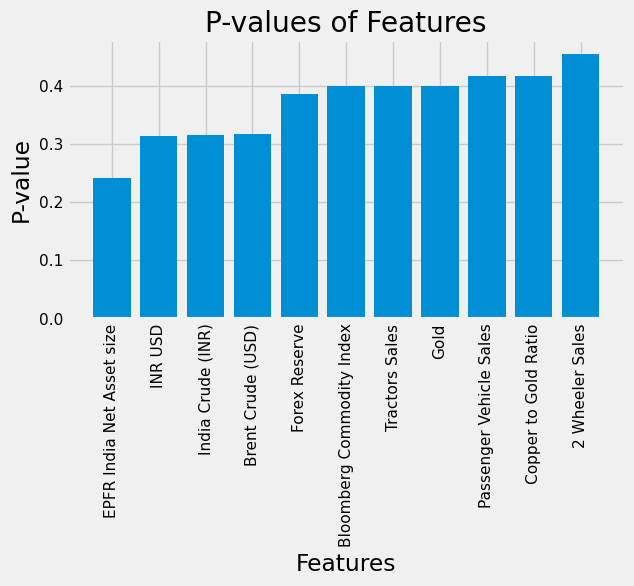

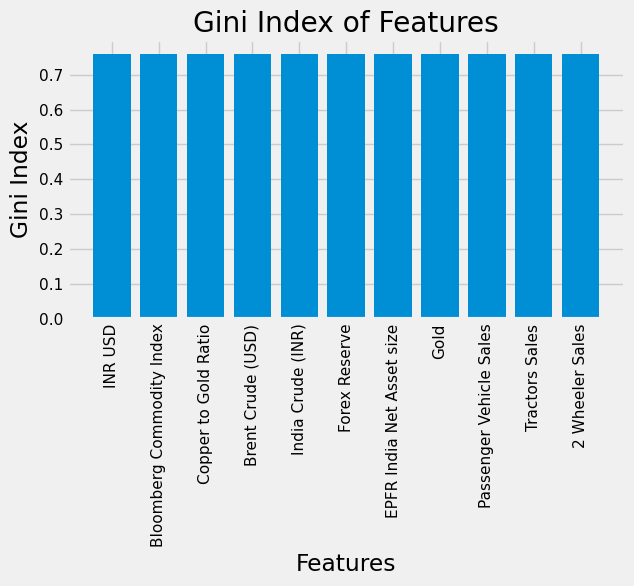

In [266]:
#Chi-square obervation in graph
# create a bar chart
fig, ax = plt.subplots()
ax.bar(chi_results['Feature'], chi_results['P-Value'])

# set the title and axis labels
ax.set_title('P-values of Features')
ax.set_xlabel('Features')
ax.set_ylabel('P-value')
# adjust the spacing between the bars
plt.subplots_adjust(bottom=0.3)

# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()


#Gini index obervation in graph
# create a bar chart
fig, ax = plt.subplots()
ax.bar(results_gini['Feature'], results_gini['Gini Index'])

# set the title and axis labels
ax.set_title('Gini Index of Features')
ax.set_xlabel('Features')
ax.set_ylabel('Gini Index')
# adjust the spacing between the bars
plt.subplots_adjust(bottom=0.3)

# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()  


# Using Chi -square the top 5 factors are:
#   EPFR India Net Asset size
#                   INR USD   
#           India Crude (INR)   
#           Brent Crude (USD)   
#               Forex Reserve   


# Using Gini- index there is no difference in the factors and all are equally important.

# Implementing Machine Learning Techniques

### Classification -- Decision Tree classifier
Following out business problem, we wanted to predict the value of NIFTY price, hence we used decision tree classifiers. It is imperitive to note here that the NIFTY price doesnot only depend on the factors whcih have considered for the analysis, but also on a lot of other factors like Fed Balance Sheet as a % of GDP Reserve Money as a % of GDP RBI OBICUS Capacity Utilisation etc whose data was not available with us. Hence, we decided on having a bracket in which NIFTY prices fall and not an exact value.


X_train: 
     INR USD  Bloomberg Commodity Index  Copper to Gold Ratio  \
13     -5.6                      -23.1                 -19.8   
39     -5.9                       18.0                 -14.2   
18      2.4                       14.5                  12.9   
2      -0.2                       -5.9                 -12.8   
28     -2.0                       20.2                  25.7   

    Brent Crude (USD)  India Crude (INR)  Forex Reserve  \
13              -58.0              -64.0            8.3   
39               47.6               58.2           -6.4   
18               80.1               79.8           14.0   
2                 9.8                9.5            7.1   
28               36.6               39.0            5.1   

    EPFR India Net Asset size  Gold  Passenger Vehicle Sales  Tractors Sales  \
13                      -37.0   6.1                   -100.0           -88.9   
39                      -23.0   5.8                     26.4           112.7   
18       

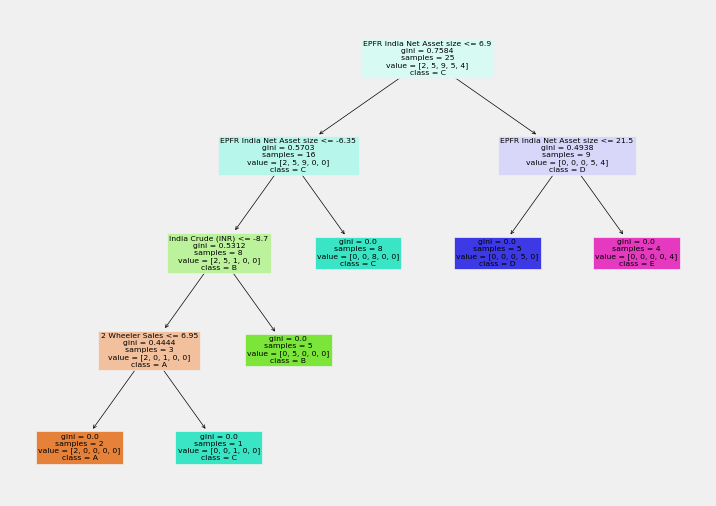

In [267]:
# Split data into training and testing sets

from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


print("X_train: \n",X_train.head())
print("y_train: \n",y_train.head())

# Build decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = tree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# fit the classifier to the data

X = df.drop(['Nifty Price','target_valriable'], axis=1)
y = df['target_valriable']

# plot the decision tree
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=X.columns, class_names=['A', 'B', 'C', 'D', 'E'], filled=True, precision=4)
plt.show()


### Clustering - kmeans
We did Kmeans analysis as we wanted to understand iwhat are the most importance factors and therefore, can be used in dimensionality reduction. 
We also wanted to understand the data which is close to each other and can also contribute to categorization.

   Nifty Price  INR USD  Bloomberg Commodity Index  Copper to Gold Ratio  \
0          6.3      4.8                       -4.8                  -4.6   
1         13.1      6.3                       -3.1                   0.8   
2          9.6     -0.2                       -5.9                 -12.8   
3          8.5      1.1                        3.8                  -8.5   
4          2.7      3.3                       -2.2                 -10.3   

   Brent Crude (USD)  India Crude (INR)  Forex Reserve  \
0              -17.3              -22.0            2.8   
1               -3.5              -10.8            6.7   
2                9.8                9.5            7.1   
3               23.7               22.8            8.7   
4                5.3                0.8            7.9   

   EPFR India Net Asset size  Gold  Passenger Vehicle Sales  Tractors Sales  \
0                       -2.2   4.3                     -1.2           -29.8   
1                        8.1   0.1  

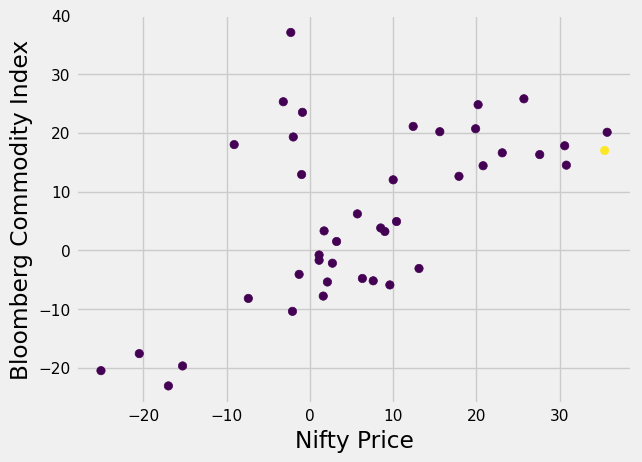

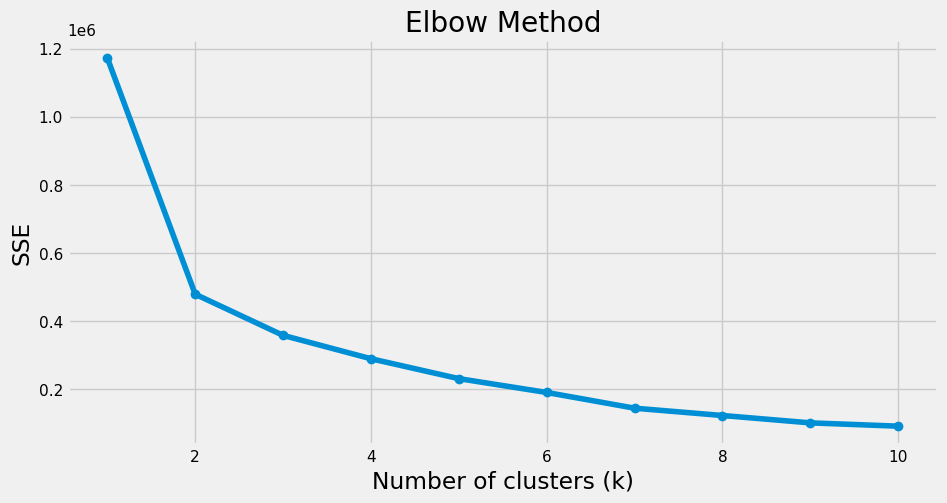

In [268]:
# Separate the target variable from the features
X = df.drop(['target_valriable'], axis=1)

# Create a k-means clustering object with k=2
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels

print(df.head())

# Visualize the clusters using a scatter plot
plt.scatter(df['Nifty Price'], df['Bloomberg Commodity Index'], c=df['cluster'])
plt.xlabel('Nifty Price')
plt.ylabel('Bloomberg Commodity Index')
plt.show()

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df.drop(columns='target_valriable'))
    sse.append(kmeans.inertia_)

# plot the SSE values against each k value
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


## Conclusion 

Classification Report : 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         2
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Clustering - kmeans



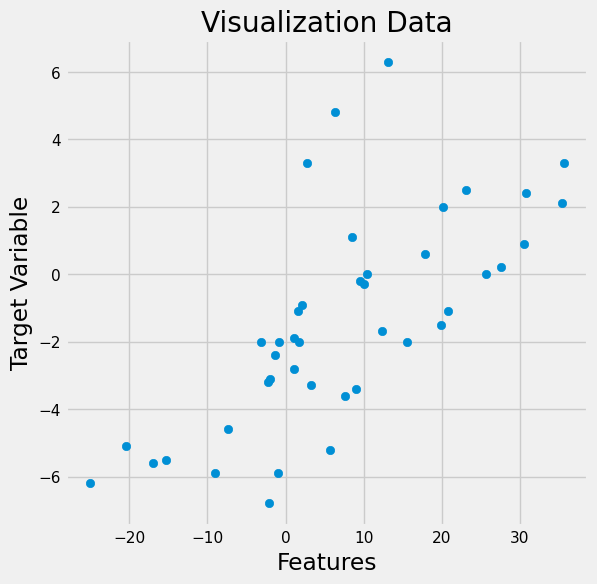

In [269]:
from sklearn.linear_model import LogisticRegression

#Classification Report
# Split your data into training and test sets
 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Nifty Price','target_valriable'], axis=1), 
                                                    df['target_valriable'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train your classifier (in this example, we use LogisticRegression)
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

# Predict the target variable for your test data
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report : \n", report)


#k-means
print("Clustering - kmeans\n")
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.title('Visualization Data');

#The performance of Decision tree accuracy, precision, recall  shown in table
#The performance of k-means algo can be infered by number of cluster given by elbow curve shown in above figure